# **Импорт важных библиотек**


In [ ]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации

import seaborn as sns # библиотека seaborn для визуализации

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

from sklearn.metrics import top_k_accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

# **Набор данных MNIST**

В качестве данных мы рассмотрим набор данных MNIST

Классический набор изображений рукописных цифр

Размер изображений 28 на 28, что можно рассматривать как большую таблицу признаков из 784 столбцов

Единственный канал - "оттенки серого"

Изображения хранятся в 8-битном формате, т.е. оттенков серого 256 от 0 (черный) до 255 (белый)

In [ ]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML

X, y  = fetch_openml('mnist_784',# для этого нам необходимо знать имя набора данных
                     version=1, # и версию
                     return_X_y=True,# также указываем что хотим чтобы скачалось в формате признаки/целевые метки (return_X_y)
                                    # иначе он выгрузит в формате словаря с полной выкладкой
                     as_frame = True,# наконец попросим выгрузить данные в формате dataframe (as_frame)
                                        # иначе будут numpy массивы
                     parser='auto')
X = X / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1

Посмотрим на нашу табличку данных

In [ ]:
X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

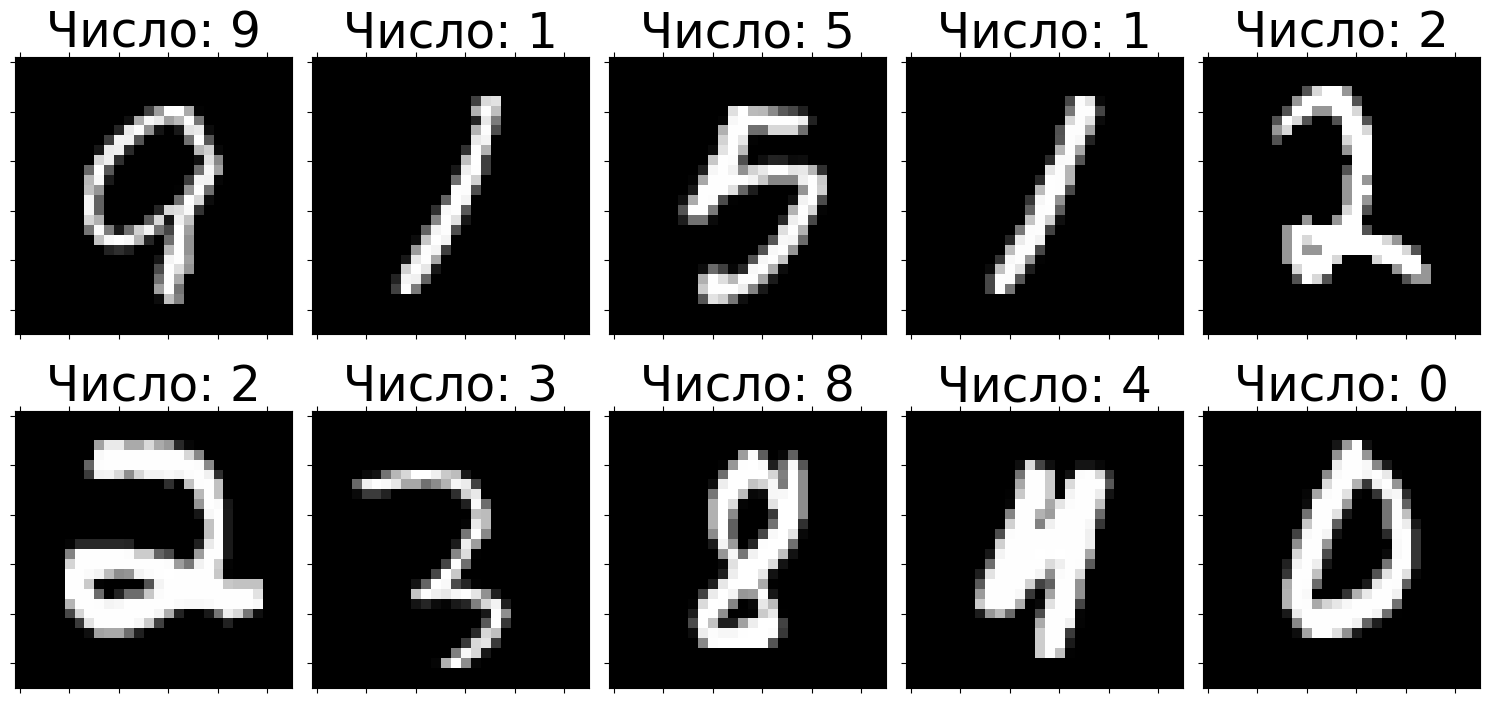

In [ ]:
#@title Разные примеры { run: "auto" }
n =  26536 #@param {type:"slider", min:1, max:69984, step:1}

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()


Разобъём данные на тестовую и тренировочную выборку

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(X.values, y.astype(int).values, test_size=.2,stratify = y,
                     random_state=42)

# **Применяем Линейный Дискриминантный Анализ к Данным MNIST**

И вновь стандартная для нас последовательность

* Создаем модель-объект (в этот раз ограничимся, допустим 4 компонентами)

* Обучаем через `.fit()`


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=4)
lda

LinearDiscriminantAnalysis(n_components=4)

In [ ]:
lda.fit(X_train, y_train);

## Функция принятия решения

Методом `.decision_function()` оцениваются функции принятия решений

Эти функции можно интерпретировать как уверенность линейного дискриминантного анализа в том, что конкретный объект принадлежит к определенному классу

In [ ]:
dec_fun = lda.decision_function(X_train);

In [ ]:
DF = pd.DataFrame(dec_fun)
DF['Цифра'] = y_train.astype(str)

In [ ]:
cm = sns.color_palette("vlag", as_cmap=True)    # создадим цветовой стиль, чтобы раскрасить табличку

In [ ]:
DF.head(10).style.background_gradient(cmap=cm,    # наш цветовой стиль
                                        vmin = -15,  # указываем нижний диапазон
                                        vmax = 15 # указываем верхний  диапазон
                                        ).format(precision=3)

# Анализ Вероятностей

In [ ]:
y_proba = lda.predict_proba(X_train);

In [ ]:
probs = pd.DataFrame(y_proba)
probs['Цифра'] = y_train.astype(str)

In [ ]:
probs.head(10).style.background_gradient(cmap=cm,    # наш цветовой стиль
                                        vmin = 0,  # указываем нижний диапазон
                                        vmax = 1 # указываем верхний  диапазон
                                        ).format(precision=3)

## Оценим качество классификации

Можно воспользоваться встроенным методом `.score()` который оценивает усредненную долю правильных ответов для каждого класса

In [ ]:
lda.score(X_train, y_train)

0.8733392857142858

Можно сделать небольшую поблажку на то что классов много и оценивать ответ за правильный, если правильная цифра есть среди к правильных предсказаний (функция `top_k_accuracy_score`)

In [ ]:
top_k_accuracy_score(y_train, y_proba, k=2)

0.948625

## Посмотрим на проекции данных

Преобразуем тренировочную выборку методом `.transform()`

In [ ]:
lda_embedd = lda.transform(X_train)

### **Очень интересный график**

In [ ]:
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)
    Входные переменные:
    ===========
    data: данные
    y: целевые метки
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2
    fig, sub = plt.subplots(2, 2, figsize = (11,11))

    # в каждом графике этого полотна мы визуализируем соответствующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)
        ax.grid()
        ax.set_xlim([-12,10])
        ax.set_ylim([-7,7])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Цифры",
                        fontsize = 10) # собираем легенду
        ax.add_artist(legend1)

Генерируем подписи к осям

In [ ]:
lda_names = ['lda-'+str(x+1) for x in range(4)]

### **Проекции для Линейного дискриминантного анализа**

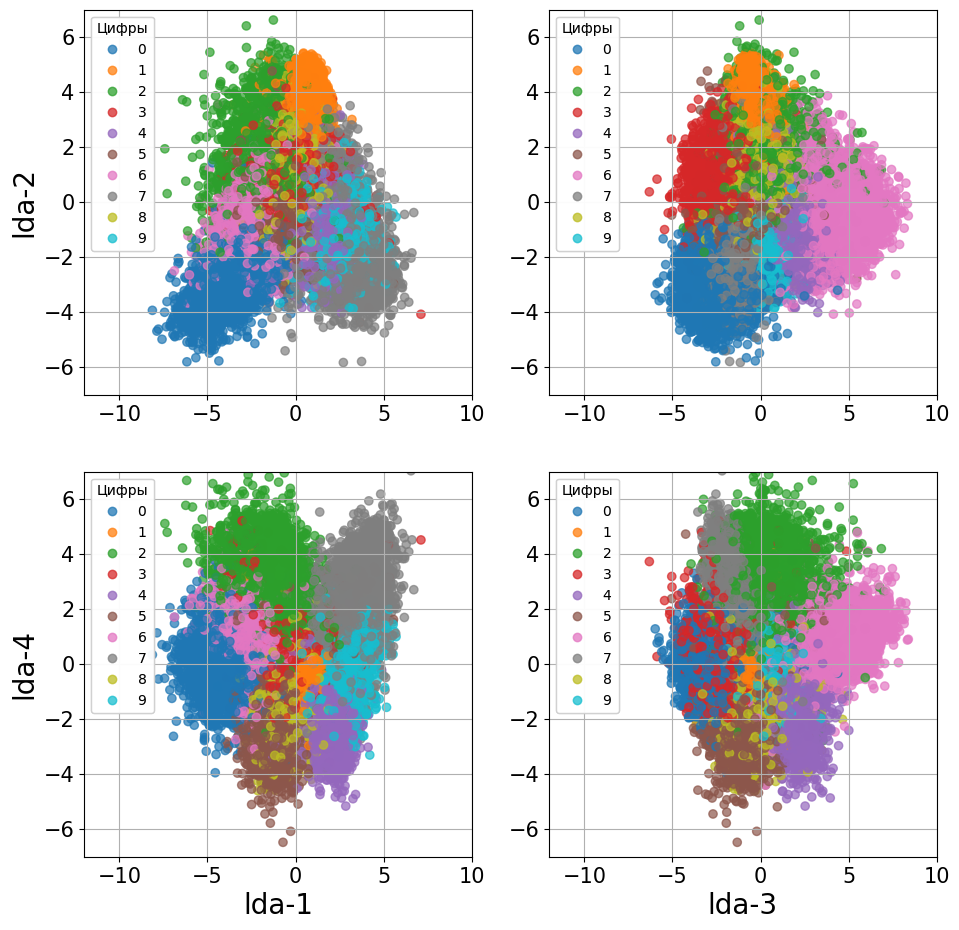

In [ ]:
plot_multi(lda_embedd, y_train.astype(int), lda_names);

## Попытка понять что значат проекции Линейного дискриминантного анализа

Веса преобразования хранятся в атрибуте `.scalings_`


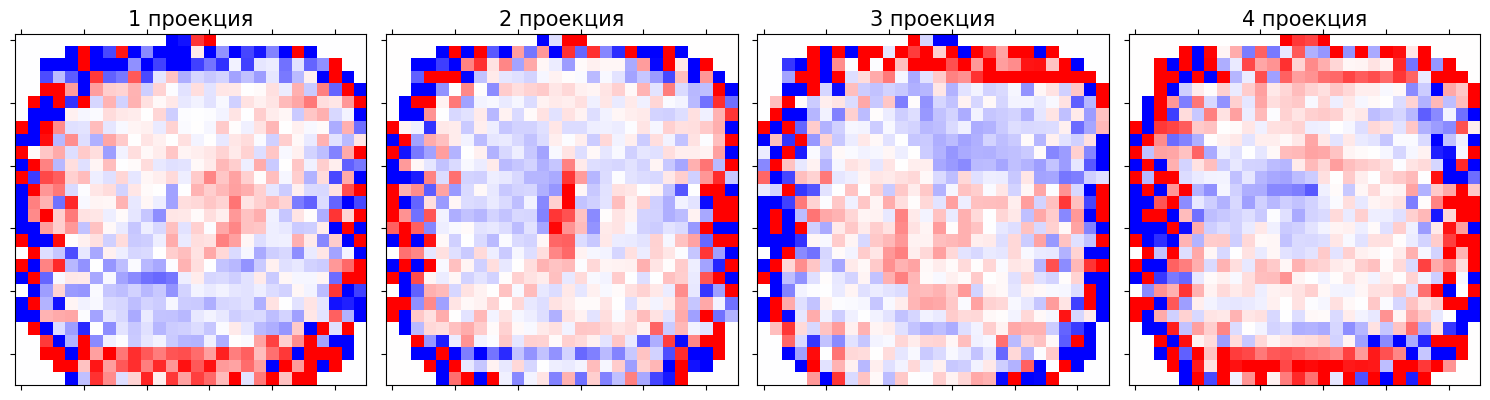

In [ ]:
W_lda=lda.scalings_
fig=plt.figure(figsize=(15,10))
for i in range(0,4):
  ax = fig.add_subplot(1,4,i+1,title=str(i+1) )
  ax.set_title("{} проекция".format(str(i+1)), size=15)
  ax.matshow(W_lda[:,i].reshape((28,28)).astype(float), cmap = 'bwr', vmin=-0.5,vmax = 0.5)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout();

# Задание

* Оцените точность линейного дискриминантного анализа для классификации набора  MNIST на тестовых данных

* Сравните визуализацию проекций используя тестовые данные

* Проанализируйте ошибки линейного дискриминантного анализа используя функцию принятия решений. Какие цифры как правило путаются друг с другом?